# Prediction using Supervised Machine Learning - The Sparks Foundation - Task 1 - Naved Naik

In this Task we predict the percentage of a student using Supervised Machine Learning.

We use a simple linear regression algorithm as the data correlation has straight line characteristic.




In [1]:
# Here we are importing the libraries we would need to work with the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb # a data visualization library
from sklearn.linear_model import LinearRegression #As we already know the data has a linear relation we import this, else we could find the relation and then import
from sklearn.model_selection import train_test_split 

In [2]:
# Now we read the csv file link which contains the data of hours studied and the respective scores.
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
print(data) #This line displays the data stored in the csv file which we read and stored in the variable named data

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
data.info() #Here we check for any null values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


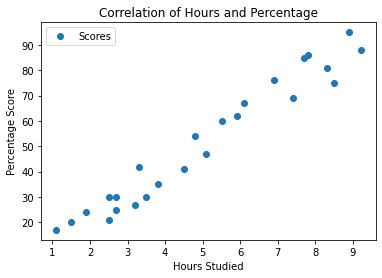

In [5]:
data.plot(x='Hours', y= 'Scores', style = 'o')
plt.title('Correlation of Hours and Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [6]:
#From the graph we come to know that the relation between hours and percentage can be approximated to a straight line i.e linear relationship with good accuracy in results.


In [7]:
# Now we split the data for training and testing

X = data.iloc[:, :-1].values 
Y = data.iloc[:, 1].values 
X


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [9]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=0) #Here we train our model witht the training set
lr=LinearRegression()
lr.fit(X_train, Y_train)
print ("Training completed")

Training completed


In [10]:
lr.predict(X_test)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [11]:
Y_test

array([20, 27, 69, 30, 62])

In [12]:
line = lr.coef_*X+lr.intercept_  #y=mx=c where m(slope)= lr.coef, and c(intercept)= lr.intercept 

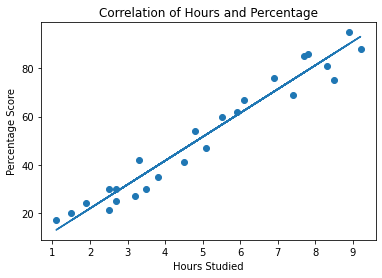

In [13]:
# Plotting the straight line passing through the data set 
plt.scatter(X,Y)
plt.plot(X, line)
plt.title('Correlation of Hours and Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [14]:
Y_pred = lr.predict(X_test) # Here we predict some values for test data
print(X_test)
print(Y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [15]:
predictedscores=pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred}) #Forming a Table for the predicted scores
predictedscores

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
predictedscores.describe()

,Actual,Predicted
count,5.000000,5.000000
mean,41.600000,42.651852
std,22.255336,24.407192
min,20.000000,16.884145
25%,27.000000,26.794801
50%,30.000000,33.732261
75%,62.000000,60.491033
max,69.000000,75.357018


In [17]:


n = float(input("Enter no of hours studied per day:- "))
pre1 = lr.predict([[n]])
print(f"If the number of hours studied are {n}.\nThe Predicted score is {pre1[0]}")



Enter no of hours studied per day:- 9.25
If the number of hours studied are 9.25.
The Predicted score is 93.69173248737538


In [20]:
from sklearn.metrics import mean_squared_error # Here we check the the check the accuracy of a model. We can compared the squared mean of various algorithm to chose the most reliable one
mean_squared_error(Y_test,Y_pred,squared=False)

4.6474476121003665

# Predicting the score if a student studies for 9.25 hours/day?

In [22]:
print(f"\nThe Predicted Score is {pre1[0]} if a student studies for {9.25} hours a day.")


The Predicted Score is 93.69173248737538 if a student studies for 9.25 hours a day.
